# Load libraries

In [1]:
# import [package name] as [name abbr.]
# python 處理數字跟 tensor 運算的主要套件
import numpy as np
# google 的 NN coding 套件
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
# 有可能會出現警告，但是可以不用理他
# c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36:
# FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating`
# is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
# from ._conv import register_converters as _register_converters
import matplotlib.pyplot as plt

# Load MNIST

In [2]:
mnist = input_data.read_data_sets('../../../dataset/MNIST', one_hot=True)

train_data = mnist.train.images # Returns np.array
print(train_data.shape)
# print(train_data[0,:])
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
print(train_labels.shape)
# print(train_labels[0])

test_data = mnist.test.images # Returns np.array
print(test_data.shape)
# print(test_data[0,:])
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
print(test_labels.shape)
# print(test_labels[0])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../../dataset/MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../../dataset/MNIST\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../../dataset/MNIST\t10k-images-idx3-ubyte.gz
Extracting ../../../dataset/MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


#  Define Model the Structure (Basic)

In [3]:
# # Define Model Input (x) and Output (y_),  y_ = f(x)
# x = tf.placeholder(tf.float32, [None, 784])
# y_ = tf.placeholder(tf.int32, [None])
# y_one = tf.one_hot(y_,10)

# # Define Model parameters
# w1 = tf.get_variable('w1',shape=[784, 512], initializer=tf.glorot_uniform_initializer())
# b1 = tf.get_variable('b1',shape=[512], initializer=tf.zeros_initializer)


# w2 = tf.get_variable('w2',shape=[512, 10], initializer=tf.glorot_uniform_initializer())
# b2 = tf.get_variable('b2',shape=[10], initializer=tf.zeros_initializer)

# h1 = tf.matmul(x, w1) + b1
# h1_sigmoid = tf.sigmoid(h1)
# y = tf.matmul(h1_sigmoid, w2) + b2

#  Define Model Structure (tf.leyers)

In [4]:
# Define Model Input (x) and Output (y_),  y_ = f(x)
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.int32, [None])
y_one = tf.one_hot(y_,10)

h1 = tf.layers.dense(x,512,activation=None)
h1_sigmoid = tf.sigmoid(h1)
y = tf.layers.dense(h1_sigmoid,10,activation=None)

In [5]:
# Define the Model Loss (4)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_one, logits=y))

# Define the Optimizer (5)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

y_pred = tf.argmax(tf.nn.softmax(y), 1, output_type=tf.int32)

# Accuracy of the Model
correct_prediction = tf.equal(y_pred, y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# initialize the model
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# Training & Evaluation

In [6]:
# Train Model for 1000 steps
hist_train_acc = []
hist_valid_acc = []
for step in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if (step % 100 == 0):
        acc_train = sess.run(accuracy, feed_dict={x: train_data, y_: train_labels})
        acc_valid = sess.run(accuracy, feed_dict={x: test_data, y_: test_labels})
        hist_train_acc.append(acc_train)
        hist_valid_acc.append(acc_valid)
        print("Accuracy: [T] %.4f / [V] %.4f" % (acc_train,acc_valid))

print(sess.run(y_pred, feed_dict={x: test_data,y_: test_labels}))
sess.close()

Accuracy: [T] 0.0989 / [V] 0.0980
Accuracy: [T] 0.4193 / [V] 0.4367
Accuracy: [T] 0.5840 / [V] 0.5939
Accuracy: [T] 0.6959 / [V] 0.7097
Accuracy: [T] 0.7125 / [V] 0.7237
Accuracy: [T] 0.7343 / [V] 0.7478
Accuracy: [T] 0.7584 / [V] 0.7745
Accuracy: [T] 0.7520 / [V] 0.7659
Accuracy: [T] 0.7801 / [V] 0.7924
Accuracy: [T] 0.8078 / [V] 0.8194
[7 2 1 ... 4 8 6]


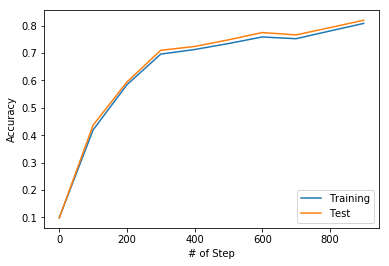

In [7]:
x = [x*100 for x in range(len(hist_train_acc))]
line_train, = plt.plot(x, hist_train_acc, label='Training')
line_test, = plt.plot(x, hist_valid_acc, label='Test')
plt.xlabel('# of Step')
plt.ylabel('Accuracy')
plt.legend(handles=[line_train,line_test], loc=4)
plt.savefig('./training_curve/lecture_example.png')
plt.show()
plt.close()